In [16]:
!pip install seaborn

In [23]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file
adata = sc.read_h5ad("all_cells.h5ad")

# Extract the relevant data
data = adata.to_df()

# Add 'CD8_alpha_depletion' to the dataframe if it's an observation
data['CD8_alpha_depletion'] = adata.obs['CD8_alpha_depletion']

# Calculate the correlation between GZM expression and CD8 alpha depletion
gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
correlations = {}

for gene in gzm_genes:
    correlation, p_value = spearmanr(data[gene], data['CD8_alpha_depletion'])
    correlations[gene] = (correlation, p_value)

# Print the correlation results
for gene, (correlation, p_value) in correlations.items():
    print(f'Correlation between {gene} and CD8 alpha depletion: {correlation:.2f} (p-value: {p_value:.2e})')

# Visualize the correlation using scatter plots
sns.pairplot(data, x_vars=gzm_genes, y_vars='CD8_alpha_depletion', kind='reg', height=5)
plt.suptitle('Correlation between GZM Expression and CD8 Alpha Depletion', y=1.02)
plt.show()


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'all_cells.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
print(adata.obs.columns)
print(data.columns)


NameError: name 'adata' is not defined

In [12]:
import scanpy as sc
import pandas as pd

# Load the .h5ad file
adata = sc.read_h5ad("all_cells.h5ad")

# Print the columns to verify
print("Obs columns:", adata.obs.columns)
print("Data columns:", adata.var.index)

# Convert to dataframe
data = adata.to_df()

# Check the first few rows of the dataframe
print(data.head())

# Ensure 'CD8_alpha_depletion' column exists
if 'CD8_alpha_depletion' in adata.obs.columns:
    data['CD8_alpha_depletion'] = adata.obs['CD8_alpha_depletion']
    print(data['CD8_alpha_depletion'].head())
else:
    print("CD8_alpha_depletion column is not in obs")

# Check if GZM genes are present
gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
for gene in gzm_genes:
    if gene in data.columns:
        print(f"{gene} is present in the data")
    else:
        print(f"{gene} is not present in the data")

# Check for null values
print(data.isnull().sum())


MemoryError: Unable to allocate 4.65 GiB for an array with shape (41976, 29766) and data type float32

In [14]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CD8_alpha_depletion' is present
if 'CD8_alpha_depletion' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    correlations = {}
    
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.toarray().flatten()
            data2 = obs_data['CD8_alpha_depletion']
            correlation, p_value = spearmanr(data1, data2)
            correlations[gene] = (correlation, p_value)
        else:
            print(f"{gene} is not in the dataset")

    # Print the correlation results
    for gene, (correlation, p_value) in correlations.items():
        print(f'Correlation between {gene} and CD8 alpha depletion: {correlation:.2f} (p-value: {p_value:.2e})')
else:
    print("CD8_alpha_depletion column is not in obs")

# Convert adata to dense dataframe for pairplot (be cautious with large datasets)
data = adata.to_df()

# Add 'CD8_alpha_depletion' to the dataframe
data['CD8_alpha_depletion'] = obs_data['CD8_alpha_depletion']

# Visualize the correlation using scatter plots
sns.pairplot(data, x_vars=gzm_genes, y_vars='CD8_alpha_depletion', kind='reg', height=5)
plt.suptitle('Correlation between GZM Expression and CD8 Alpha Depletion', y=1.02)
plt.show()


CD8_alpha_depletion column is not in obs


KeyError: 'CD8_alpha_depletion'

In [16]:
import scanpy as sc

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Print the available observation columns
print("Obs columns:", adata.obs.columns)


Obs columns: Index(['sample', 'batch', 'doublet_scores', 'predicted_doublet',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'percent_mito', 'M.Number', 'treatment',
       'infection dose', 'Tissue name', 'CFU/granuloma', 'total thoracic CFU',
       'lung region', 'Gran State', 'n_counts', 'n_genes',
       'General Celltypes'],
      dtype='object')


In [18]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CFU/granuloma' is present
if 'CFU/granuloma' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    correlations = {}
    
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.toarray().flatten()
            data2 = obs_data['CFU/granuloma']
            correlation, p_value = spearmanr(data1, data2)
            correlations[gene] = (correlation, p_value)
        else:
            print(f"{gene} is not in the dataset")

    # Print the correlation results
    for gene, (correlation, p_value) in correlations.items():
        print(f'Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})')
else:
    print("CFU/granuloma column is not in obs")

# Convert adata to dense dataframe for pairplot (be cautious with large datasets)
data = adata.to_df()

# Add 'CFU/granuloma' to the dataframe
data['CFU/granuloma'] = obs_data['CFU/granuloma']

# Visualize the correlation using scatter plots
sns.pairplot(data, x_vars=gzm_genes, y_vars='CFU/granuloma', kind='reg', height=5)
plt.suptitle('Correlation between GZM Expression and CFU/granuloma', y=1.02)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

Correlation between GZMA and CFU/granuloma: -0.01 (p-value: 4.08e-03)
Correlation between GZMB and CFU/granuloma: -0.07 (p-value: 2.37e-44)
Correlation between GZMK and CFU/granuloma: -0.03 (p-value: 1.84e-10)
Correlation between GZMM and CFU/granuloma: -0.02 (p-value: 1.58e-03)


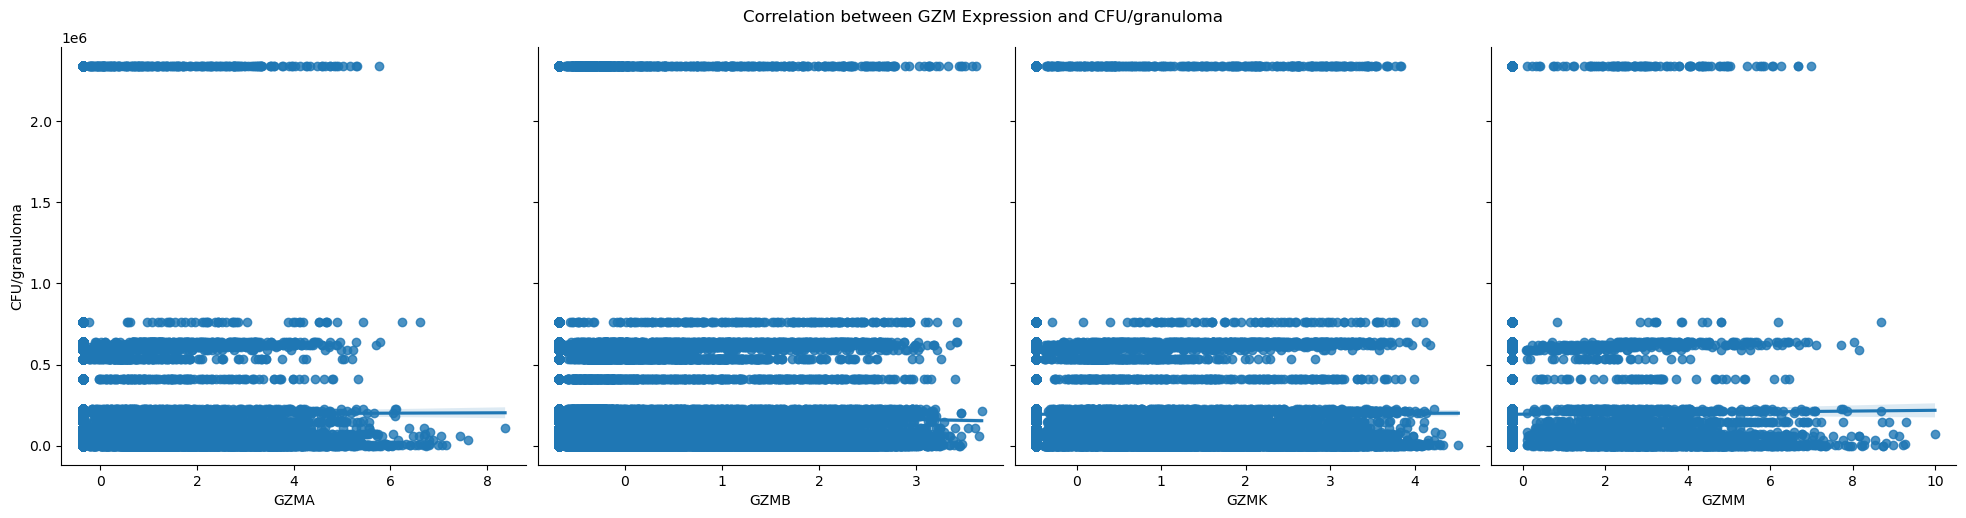

In [20]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CFU/granuloma' is present
if 'CFU/granuloma' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    correlations = {}
    
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.flatten()  # Removed toarray() since X is already a numpy array
            data2 = obs_data['CFU/granuloma']
            correlation, p_value = spearmanr(data1, data2)
            correlations[gene] = (correlation, p_value)
        else:
            print(f"{gene} is not in the dataset")

    # Print the correlation results
    for gene, (correlation, p_value) in correlations.items():
        print(f'Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})')
else:
    print("CFU/granuloma column is not in obs")

# Convert adata to dense dataframe for pairplot (be cautious with large datasets)
data = adata.to_df()

# Add 'CFU/granuloma' to the dataframe
data['CFU/granuloma'] = obs_data['CFU/granuloma']

# Visualize the correlation using scatter plots
sns.pairplot(data, x_vars=gzm_genes, y_vars='CFU/granuloma', kind='reg', height=5)
plt.suptitle('Correlation between GZM Expression and CFU/granuloma', y=1.02)
plt.show()


Correlation between GZMA and CFU/granuloma: -0.01 (p-value: 4.08e-03)
Correlation between GZMB and CFU/granuloma: -0.07 (p-value: 2.37e-44)
Correlation between GZMK and CFU/granuloma: -0.03 (p-value: 1.84e-10)
Correlation between GZMM and CFU/granuloma: -0.02 (p-value: 1.58e-03)


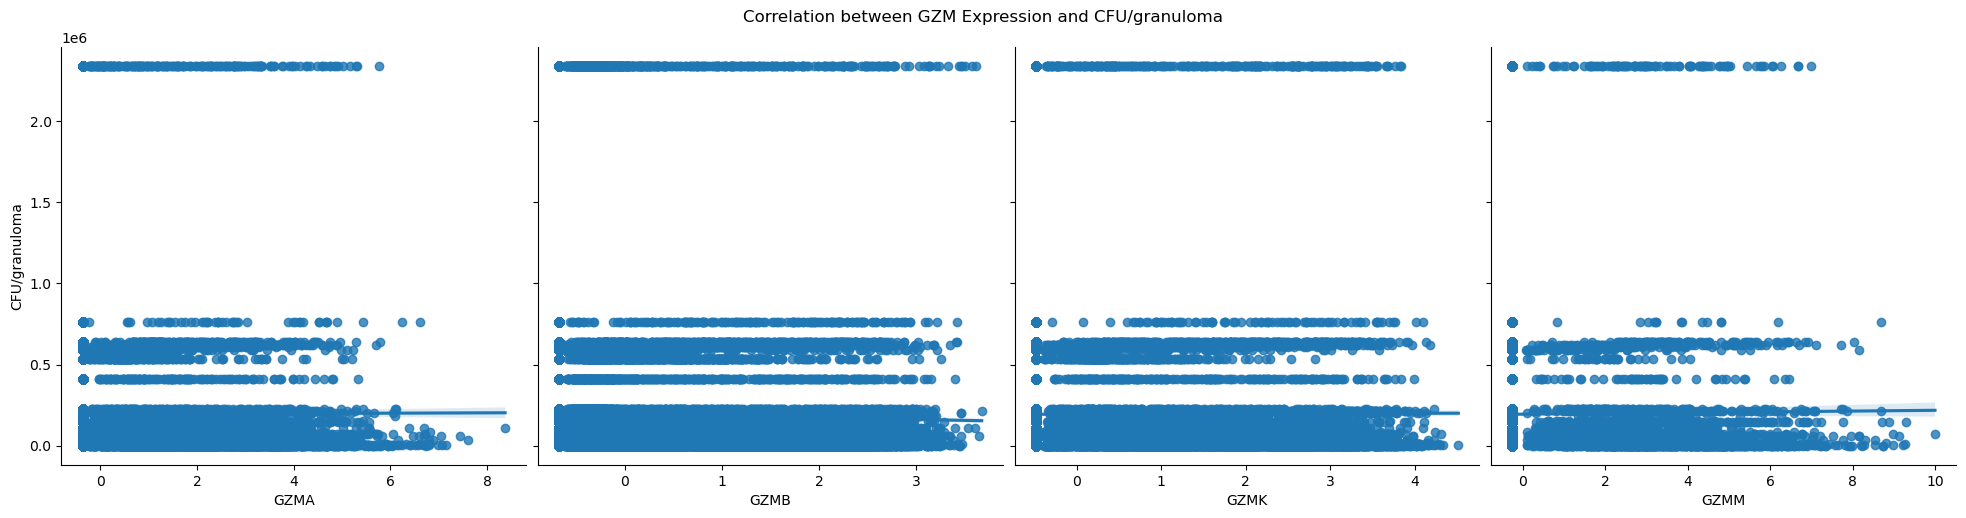

In [22]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CFU/granuloma' is present
if 'CFU/granuloma' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    correlations = {}
    
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.flatten()  # Corrected for numpy array
            data2 = obs_data['CFU/granuloma']
            correlation, p_value = spearmanr(data1, data2)
            correlations[gene] = (correlation, p_value)
        else:
            print(f"{gene} is not in the dataset")

    # Print the correlation results
    for gene, (correlation, p_value) in correlations.items():
        print(f'Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})')
else:
    print("CFU/granuloma column is not in obs")

# Convert adata to dense dataframe for visualization
data = adata.to_df()

# Add 'CFU/granuloma' to the dataframe
data['CFU/granuloma'] = obs_data['CFU/granuloma']

# Visualize the correlation using scatter plots
import seaborn as sns
sns.pairplot(data, x_vars=gzm_genes, y_vars='CFU/granuloma', kind='reg', height=5)
plt.suptitle('Correlation between GZM Expression and CFU/granuloma', y=1.02)
plt.show()


Correlation between GZMA and CFU/granuloma: -0.01 (p-value: 4.08e-03)
Correlation between GZMB and CFU/granuloma: -0.07 (p-value: 2.37e-44)
Correlation between GZMK and CFU/granuloma: -0.03 (p-value: 1.84e-10)
Correlation between GZMM and CFU/granuloma: -0.02 (p-value: 1.58e-03)


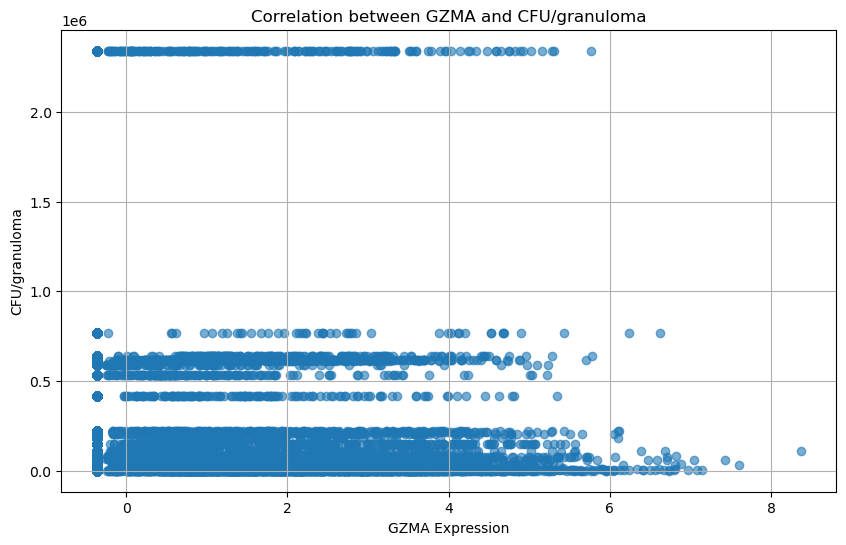

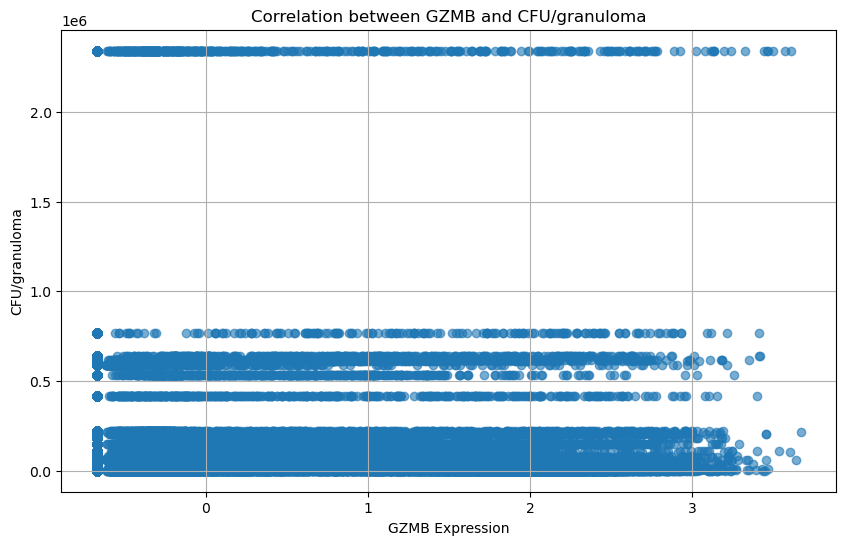

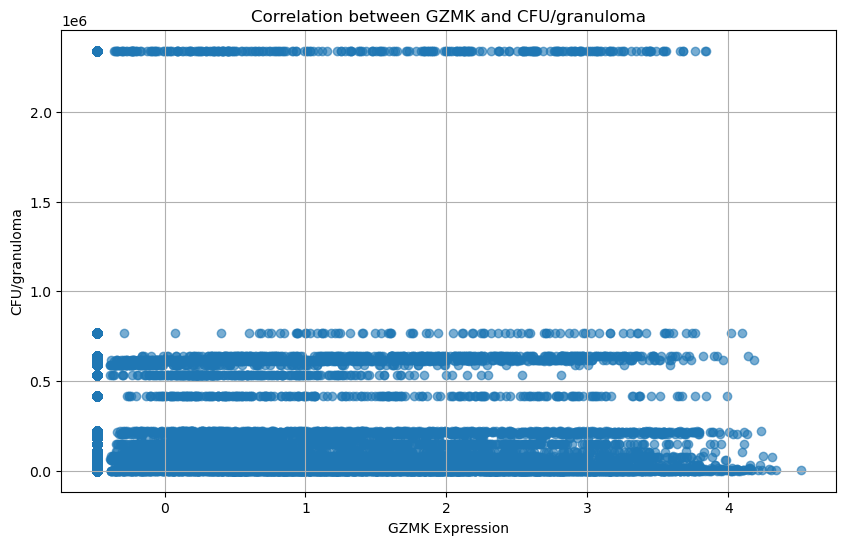

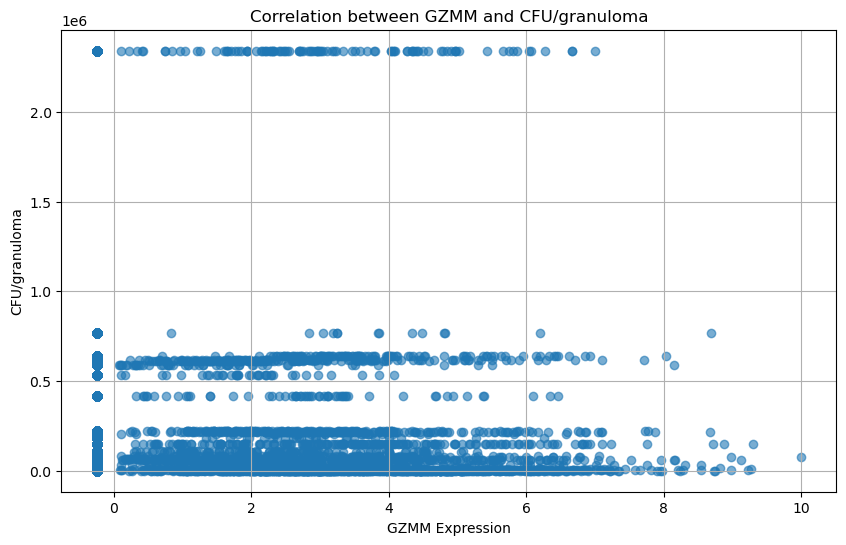

In [24]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CFU/granuloma' is present
if 'CFU/granuloma' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    correlations = {}
    
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.flatten()  # Corrected for numpy array
            data2 = obs_data['CFU/granuloma']
            correlation, p_value = spearmanr(data1, data2)
            correlations[gene] = (correlation, p_value)
        else:
            print(f"{gene} is not in the dataset")

    # Print the correlation results
    for gene, (correlation, p_value) in correlations.items():
        print(f'Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})')
else:
    print("CFU/granuloma column is not in obs")

# Convert adata to dense dataframe for visualization
data = adata.to_df()

# Add 'CFU/granuloma' to the dataframe
data['CFU/granuloma'] = obs_data['CFU/granuloma']

# Visualize the correlation using dot plots
for gene in gzm_genes:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[gene], data['CFU/granuloma'], alpha=0.6)
    plt.title(f'Correlation between {gene} and CFU/granuloma')
    plt.xlabel(f'{gene} Expression')
    plt.ylabel('CFU/granuloma')
    plt.grid(True)
    plt.show()


Correlation between GZMA and CFU/granuloma: -0.01 (p-value: 4.08e-03)
Correlation between GZMB and CFU/granuloma: -0.07 (p-value: 2.37e-44)
Correlation between GZMK and CFU/granuloma: -0.03 (p-value: 1.84e-10)
Correlation between GZMM and CFU/granuloma: -0.02 (p-value: 1.58e-03)


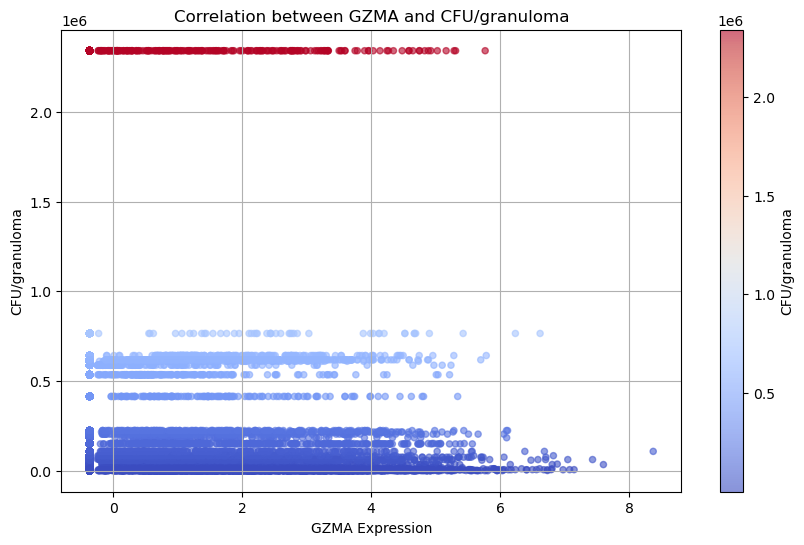

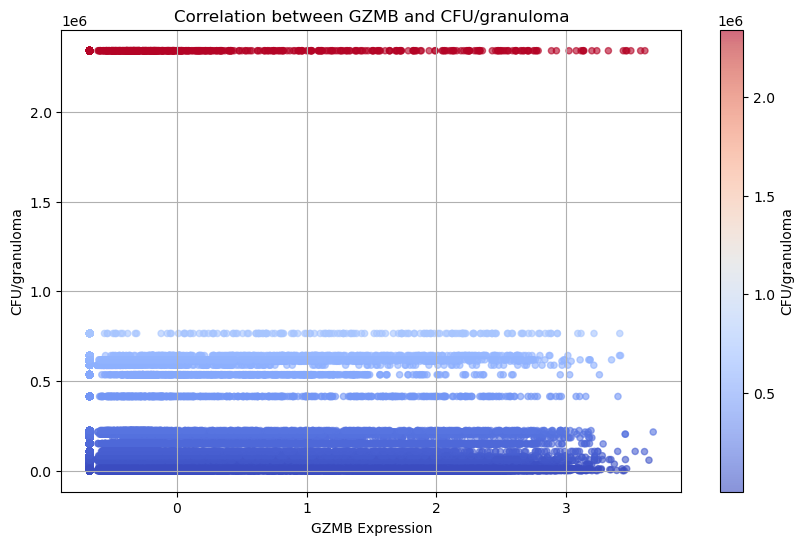

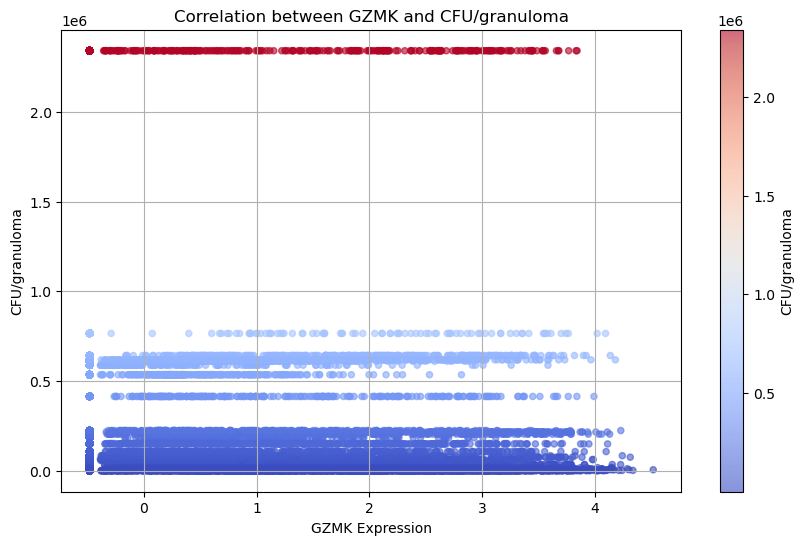

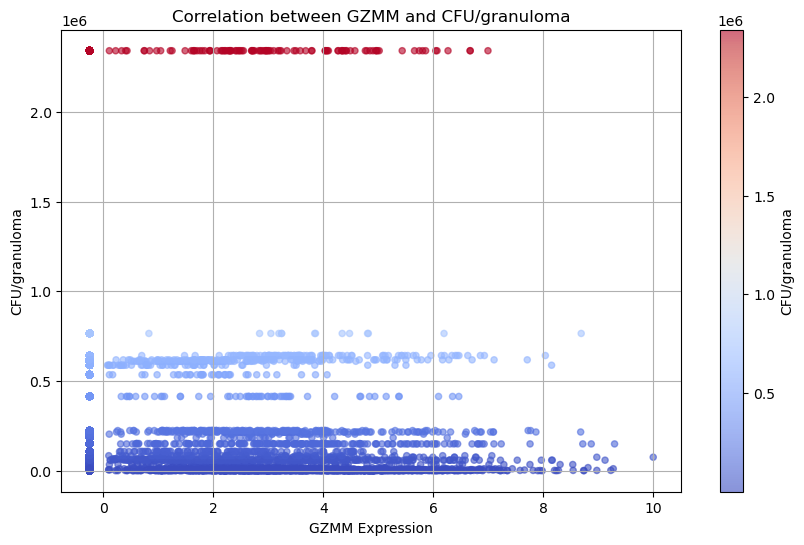

In [26]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CFU/granuloma' is present
if 'CFU/granuloma' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    correlations = {}
    
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.flatten()
            data2 = obs_data['CFU/granuloma']
            correlation, p_value = spearmanr(data1, data2)
            correlations[gene] = (correlation, p_value)
        else:
            print(f"{gene} is not in the dataset")

    # Print the correlation results
    for gene, (correlation, p_value) in correlations.items():
        print(f'Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})')
else:
    print("CFU/granuloma column is not in obs")

# Convert adata to dense dataframe for visualization
data = adata.to_df()

# Add 'CFU/granuloma' to the dataframe
data['CFU/granuloma'] = obs_data['CFU/granuloma']

# Visualize the correlation using enhanced dot plots
for gene in gzm_genes:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[gene], data['CFU/granuloma'], alpha=0.6, s=20, c=data['CFU/granuloma'], cmap='coolwarm')
    plt.title(f'Correlation between {gene} and CFU/granuloma')
    plt.xlabel(f'{gene} Expression')
    plt.ylabel('CFU/granuloma')
    plt.colorbar(label='CFU/granuloma')
    plt.grid(True)
    plt.show()


In [28]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, f_oneway

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Ensure 'CFU/granuloma' is present
if 'CFU/granuloma' in obs_data.columns:
    gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
    
    # Grouping data based on expression levels of each gene
    for gene in gzm_genes:
        if gene in adata.var_names:
            data1 = adata[:, gene].X.flatten()
            data2 = obs_data['CFU/granuloma']
            # Create bins for granzyme expression
            data['binned'] = pd.cut(data1, bins=3, labels=['Low', 'Medium', 'High'])
            groups = [data2[data['binned'] == 'Low'],
                      data2[data['binned'] == 'Medium'],
                      data2[data['binned'] == 'High']]
            f_val, p_val = f_oneway(*groups)
            print(f'ANOVA for {gene}: F-value = {f_val:.2f}, p-value = {p_val:.2e}')
else:
    print("CFU/granuloma column is not in obs")


ANOVA for GZMA: F-value = 2.49, p-value = 8.27e-02
ANOVA for GZMB: F-value = 32.88, p-value = 5.37e-15
ANOVA for GZMK: F-value = 0.34, p-value = 7.11e-01
ANOVA for GZMM: F-value = 0.16, p-value = 8.48e-01


In [30]:
# Example: Include more genes or metadata
additional_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'another_gene']
data_multivariate = adata[:, additional_genes].to_df()
data_multivariate['CFU/granuloma'] = obs_data['CFU/granuloma']

# Check correlations matrix
correlations = data_multivariate.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()


KeyError: "Values ['another_gene'], from ['GZMA', 'GZMB', 'GZMK', 'GZMM', 'another_gene'], are not valid obs/ var names or indices."

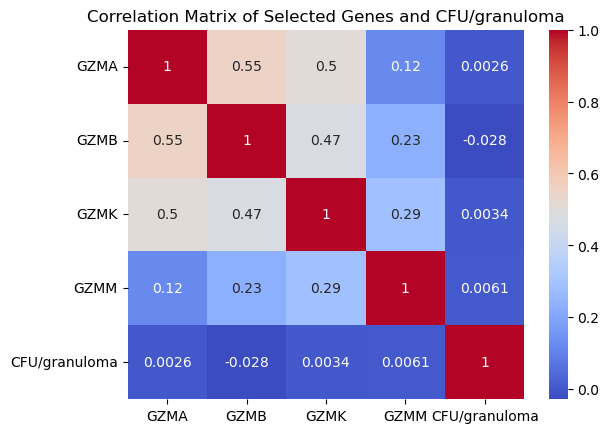

In [32]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant observations
obs_data = adata.obs

# Specify additional genes to include (make sure they exist in your dataset)
additional_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
# Check which genes are in var_names and only include those
included_genes = [gene for gene in additional_genes if gene in adata.var_names]

# Extract relevant data
data_multivariate = pd.DataFrame({gene: adata[:, gene].X.flatten() for gene in included_genes})
data_multivariate['CFU/granuloma'] = obs_data['CFU/granuloma'].values

# Check correlations matrix
correlations = data_multivariate.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Genes and CFU/granuloma')
plt.show()


C:\Users\abhic\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\abhic\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\abhic\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhic\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\abhic\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

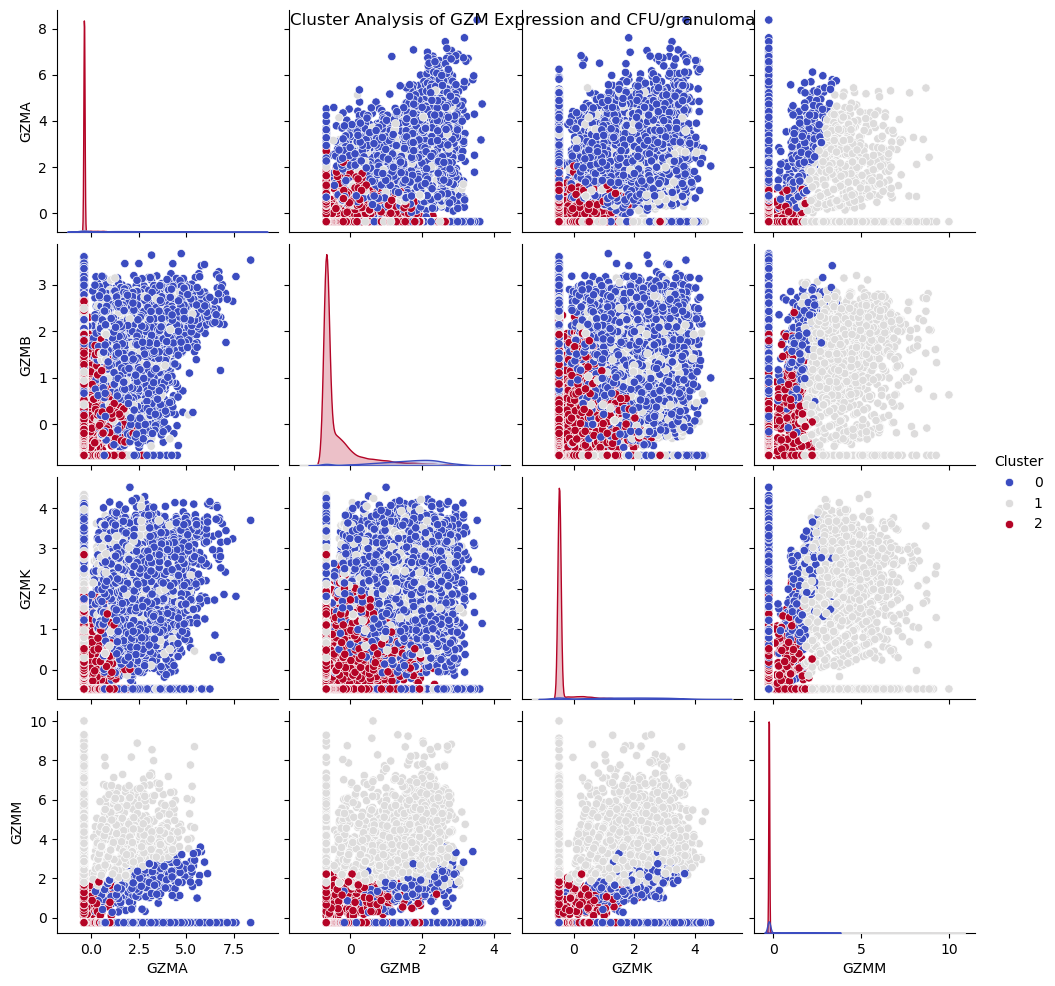

Cluster 0:
count    5.833000e+03
mean     1.861338e+05
std      4.004597e+05
min      2.600000e+02
25%      5.640000e+03
50%      3.480000e+04
75%      1.840000e+05
max      2.340000e+06
Name: CFU/granuloma, dtype: float64
Cluster 1:
count    2.203000e+03
mean     2.072429e+05
std      4.488155e+05
min      2.600000e+02
25%      4.400000e+03
50%      5.640000e+04
75%      2.100000e+05
max      2.340000e+06
Name: CFU/granuloma, dtype: float64
Cluster 2:
count    3.394000e+04
mean     1.954654e+05
std      3.855362e+05
min      2.600000e+02
25%      1.050000e+04
50%      6.240000e+04
75%      1.840000e+05
max      2.340000e+06
Name: CFU/granuloma, dtype: float64


In [34]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
data_clustering = pd.DataFrame({gene: adata[:, gene].X.flatten() for gene in gzm_genes})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Experiment with different numbers of clusters
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[gzm_genes])

# Visualize the clusters
sns.pairplot(data_clustering, hue='Cluster', vars=gzm_genes, palette='coolwarm')
plt.suptitle('Cluster Analysis of GZM Expression and CFU/granuloma')
plt.show()

# Look at the distribution of CFU/granuloma in each cluster
for i in range(3):  # Adjust based on the number of clusters
    print(f"Cluster {i}:")
    print(data_clustering[data_clustering['Cluster'] == i]['CFU/granuloma'].describe())


In [36]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
data_clustering = pd.DataFrame({gene: adata[:, gene].X.flatten() for gene in gzm_genes})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
# To avoid the warning, let's set the number of jobs to 1
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42, n_jobs=1)  # Experiment with different numbers of clusters
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[gzm_genes])

# Visualize the clusters
sns.pairplot(data_clustering, hue='Cluster', vars=gzm_genes, palette='coolwarm')
plt.suptitle('Cluster Analysis of GZM Expression and CFU/granuloma')
plt.show()

# Look at the distribution of CFU/granuloma in each cluster
for i in range(3):  # Adjust based on the number of clusters
    print(f"Cluster {i}:")
    print(data_clustering[data_clustering['Cluster'] == i]['CFU/granuloma'].describe())


TypeError: KMeans.__init__() got an unexpected keyword argument 'n_jobs'

In [38]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace with the number of cores you want to use


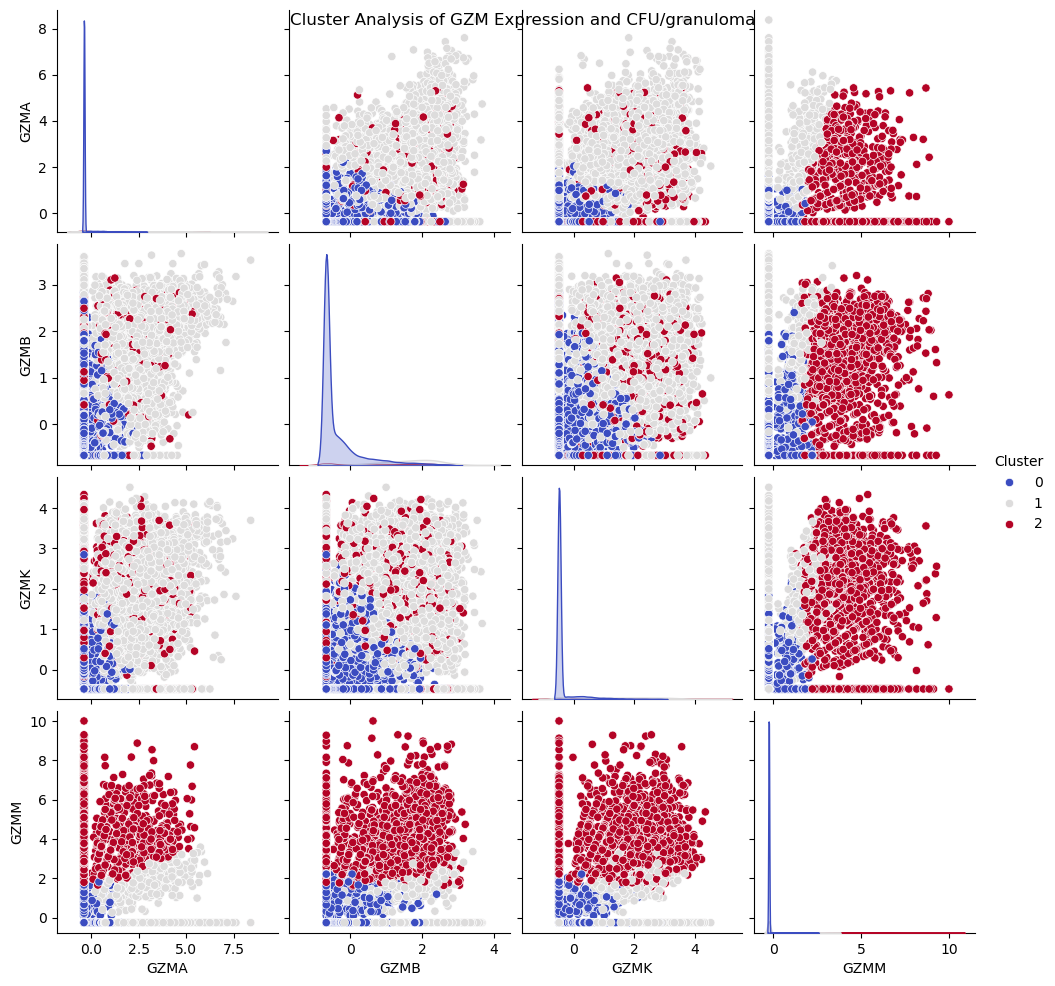

Cluster 0:
count    3.393500e+04
mean     1.954914e+05
std      3.855586e+05
min      2.600000e+02
25%      1.050000e+04
50%      6.240000e+04
75%      1.840000e+05
max      2.340000e+06
Name: CFU/granuloma, dtype: float64
Cluster 1:
count    5.838000e+03
mean     1.859912e+05
std      4.003183e+05
min      2.600000e+02
25%      5.640000e+03
50%      3.465000e+04
75%      1.840000e+05
max      2.340000e+06
Name: CFU/granuloma, dtype: float64
Cluster 2:
count    2.203000e+03
mean     2.072429e+05
std      4.488155e+05
min      2.600000e+02
25%      4.400000e+03
50%      5.640000e+04
75%      2.100000e+05
max      2.340000e+06
Name: CFU/granuloma, dtype: float64


In [40]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
gzm_genes = ['GZMA', 'GZMB', 'GZMK', 'GZMM']
data_clustering = pd.DataFrame({gene: adata[:, gene].X.flatten() for gene in gzm_genes})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Removed n_jobs
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[gzm_genes])

# Visualize the clusters
sns.pairplot(data_clustering, hue='Cluster', vars=gzm_genes, palette='coolwarm')
plt.suptitle('Cluster Analysis of GZM Expression and CFU/granuloma')
plt.show()

# Look at the distribution of CFU/granuloma in each cluster
for i in range(3):  # Adjust based on the number of clusters
    print(f"Cluster {i}:")
    print(data_clustering[data_clustering['Cluster'] == i]['CFU/granuloma'].describe())


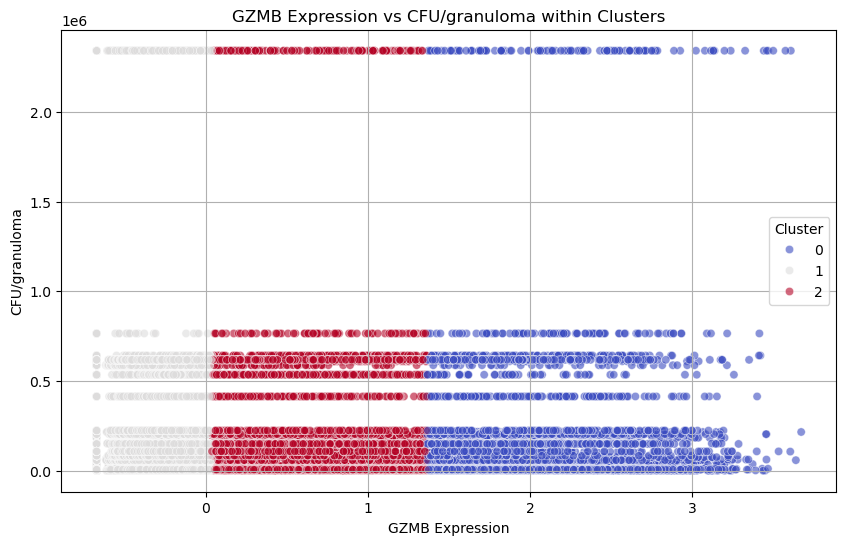

In [42]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
gzm_genes = ['GZMB']
data_clustering = pd.DataFrame({gene: adata[:, gene].X.flatten() for gene in gzm_genes})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[gzm_genes])

# Visualize GZMB expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GZMB'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GZMB Expression vs CFU/granuloma within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


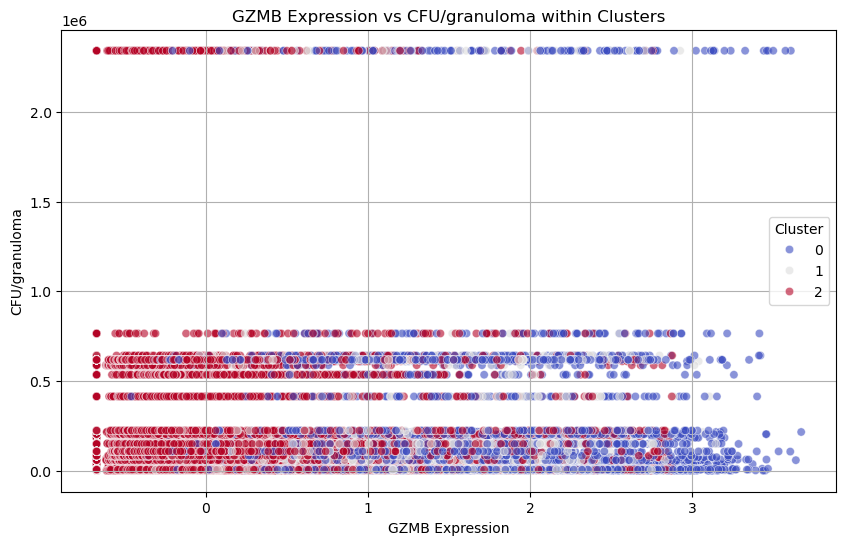

Cluster 2:
  Correlation between GZMB and CFU/granuloma: -0.02 (p-value: 1.50e-03)
  Correlation between GZMA and CFU/granuloma: 0.04 (p-value: 3.33e-12)
  Correlation between GZMK and CFU/granuloma: 0.03 (p-value: 7.53e-07)
  Correlation between GZMM and CFU/granuloma: 0.03 (p-value: 1.18e-07)
Cluster 0:
  Correlation between GZMB and CFU/granuloma: -0.10 (p-value: 1.04e-13)
  Correlation between GZMA and CFU/granuloma: 0.02 (p-value: 2.04e-01)
  Correlation between GZMK and CFU/granuloma: -0.02 (p-value: 6.36e-02)
  Correlation between GZMM and CFU/granuloma: 0.03 (p-value: 1.31e-02)
Cluster 1:
  Correlation between GZMB and CFU/granuloma: -0.13 (p-value: 2.70e-10)
  Correlation between GZMA and CFU/granuloma: -0.00 (p-value: 9.11e-01)
  Correlation between GZMK and CFU/granuloma: -0.00 (p-value: 9.68e-01)
  Correlation between GZMM and CFU/granuloma: -0.09 (p-value: 8.29e-06)


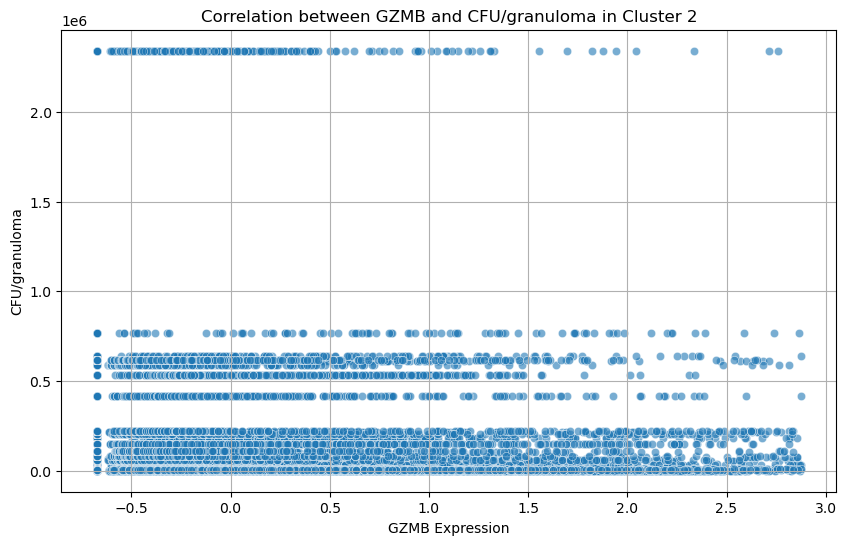

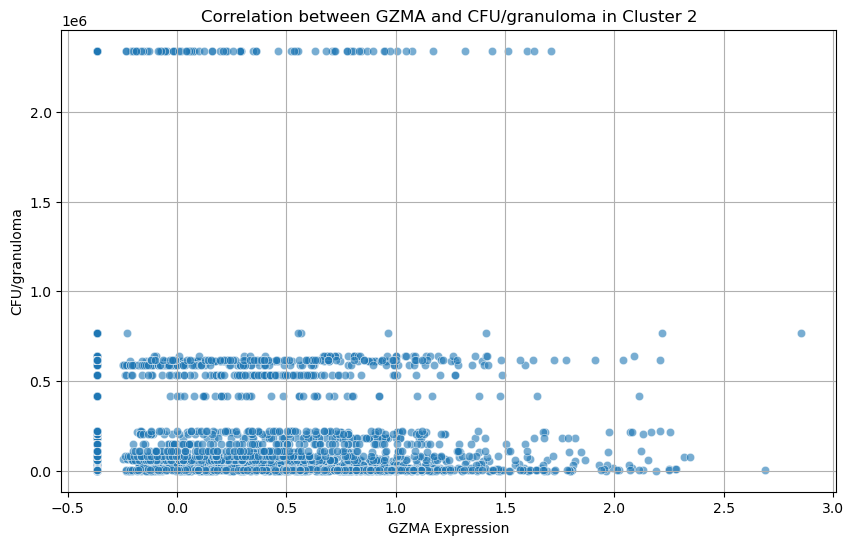

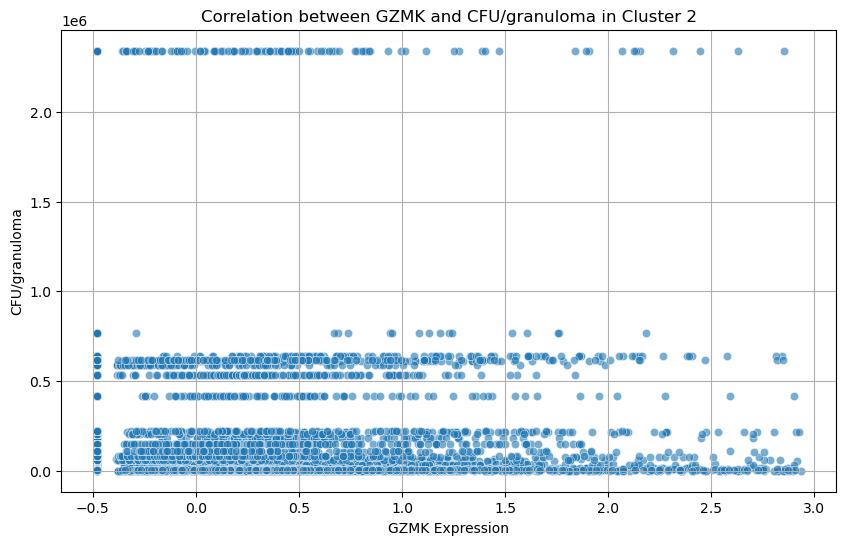

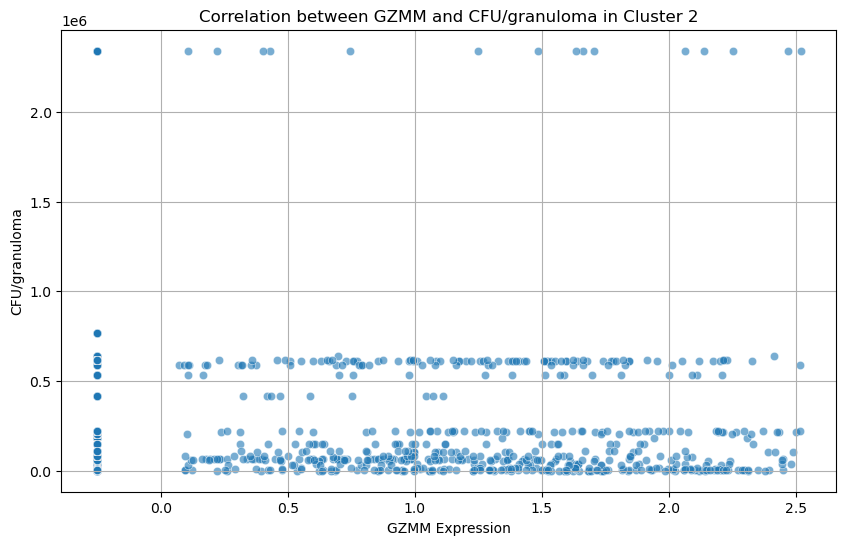

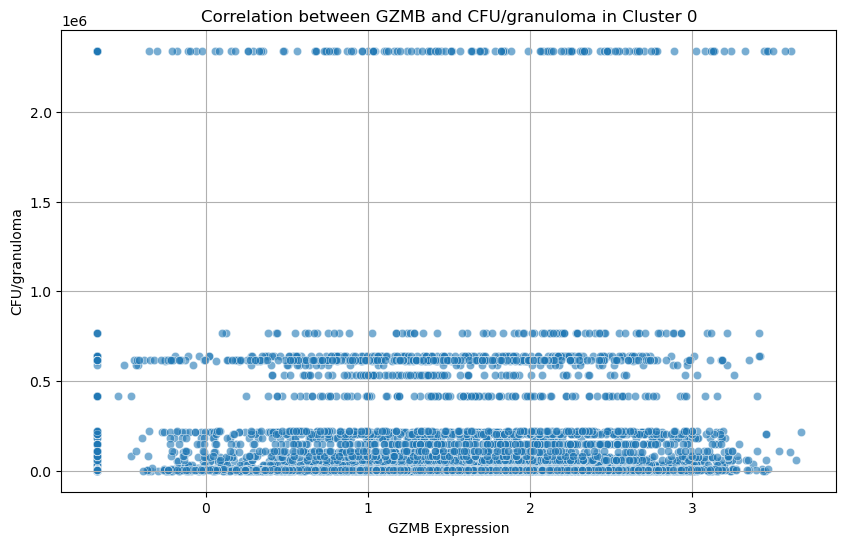

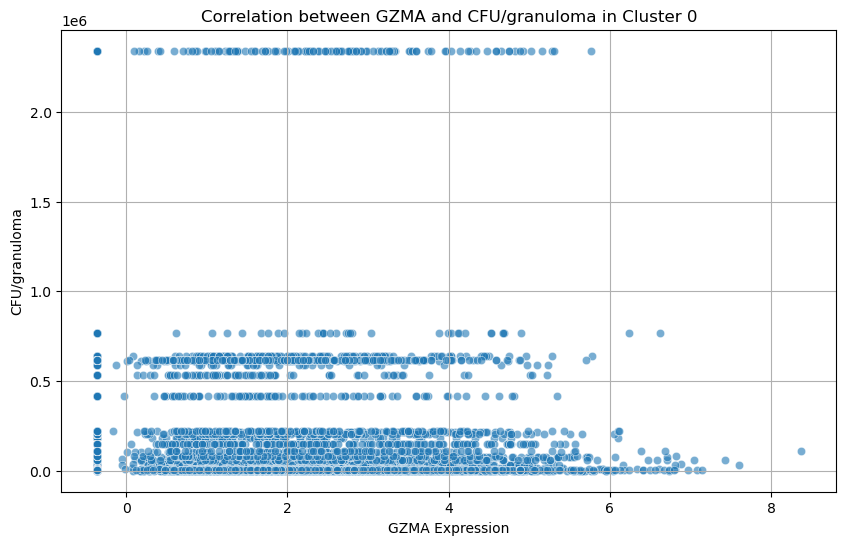

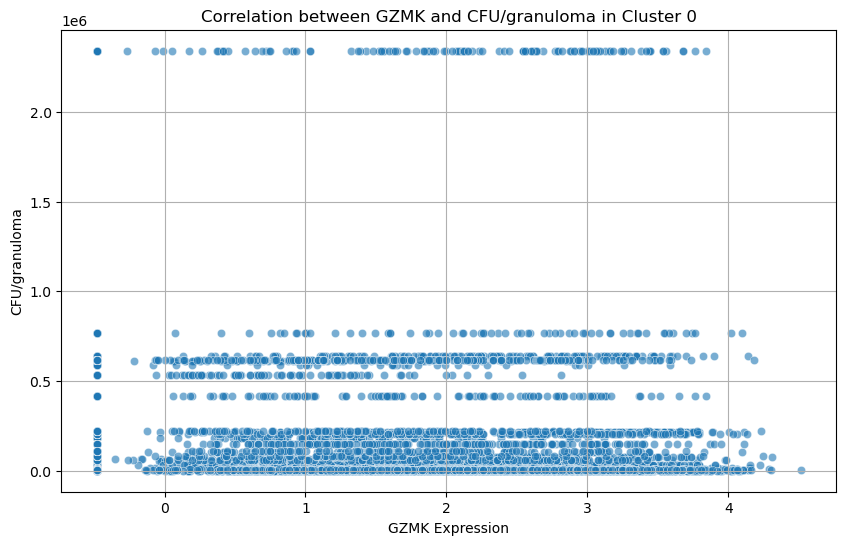

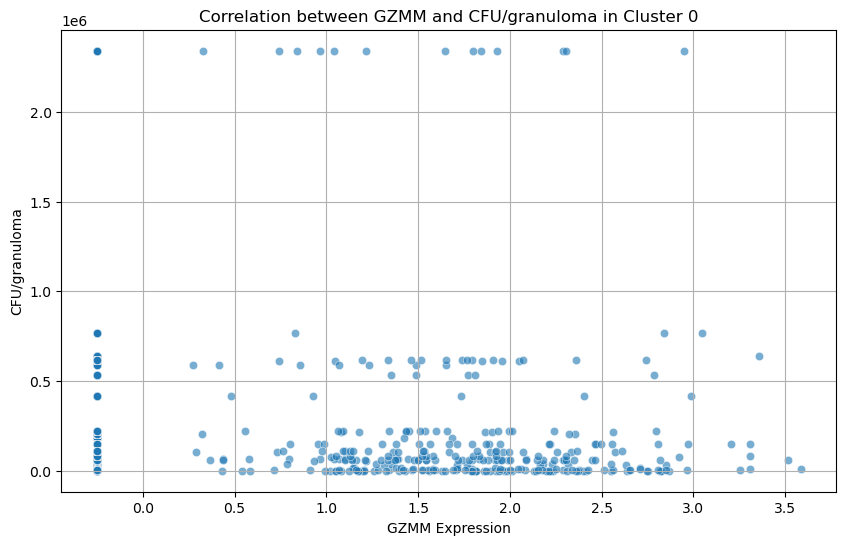

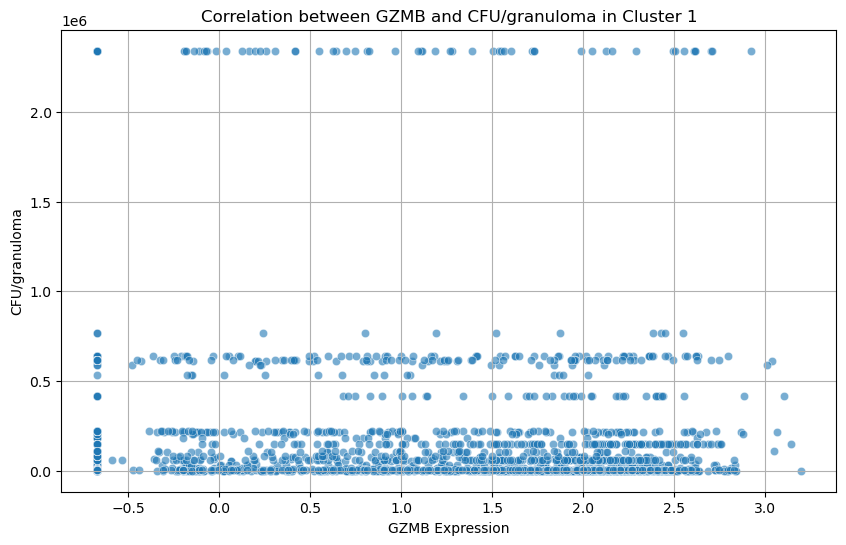

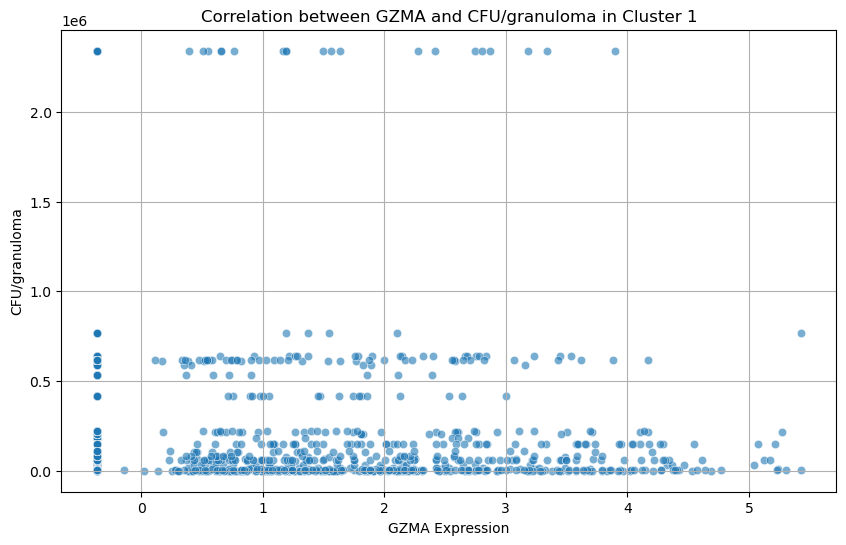

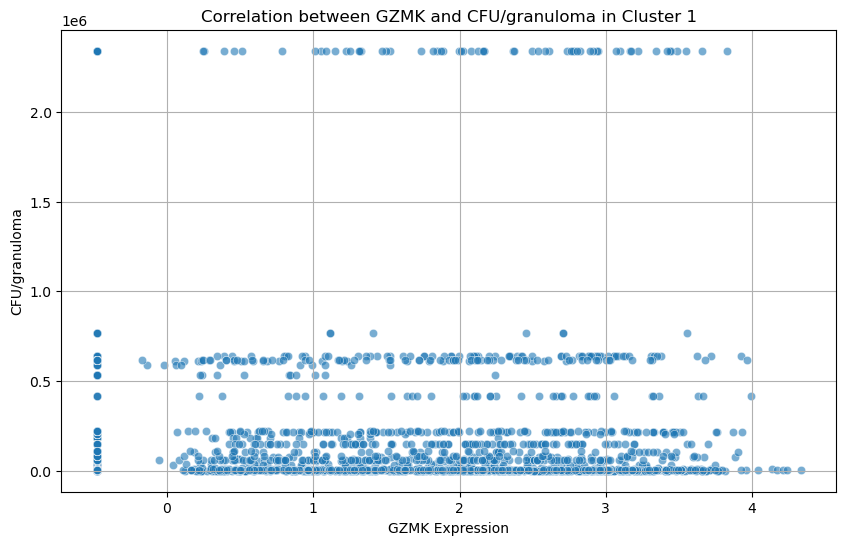

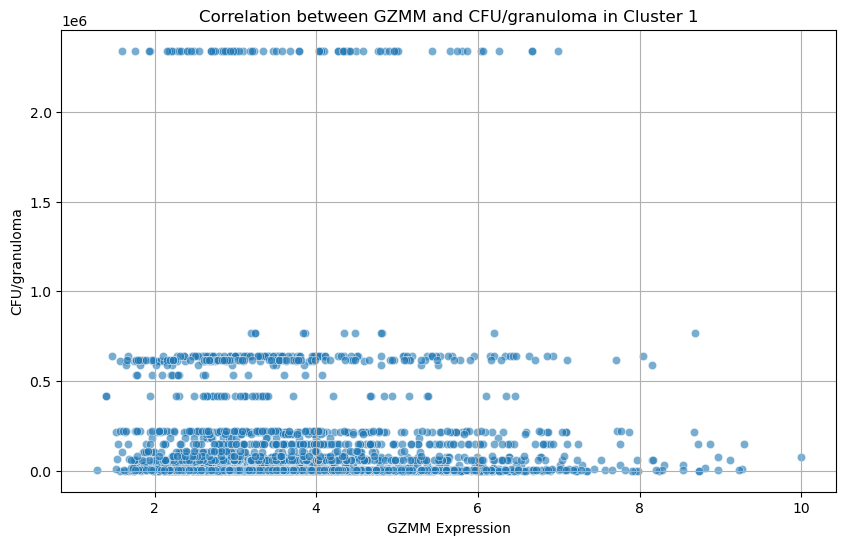

In [44]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.cluster import KMeans

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
gzm_genes = ['GZMB', 'GZMA', 'GZMK', 'GZMM']
data_clustering = pd.DataFrame({gene: adata[:, gene].X.flatten() for gene in gzm_genes})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[gzm_genes])

# Visualize GZMB expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GZMB'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GZMB Expression vs CFU/granuloma within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Compare Gene Expressions within Clusters
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    for gene in gzm_genes:
        correlation, p_value = spearmanr(cluster_data[gene], cluster_data['CFU/granuloma'])
        print(f"  Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})")

# Visualize correlations within each cluster using dot plots
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    for gene in gzm_genes:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=cluster_data[gene], y=cluster_data['CFU/granuloma'], alpha=0.6)
        plt.title(f'Correlation between {gene} and CFU/granuloma in Cluster {cluster}')
        plt.xlabel(f'{gene} Expression')
        plt.ylabel('CFU/granuloma')
        plt.grid(True)
        plt.show()


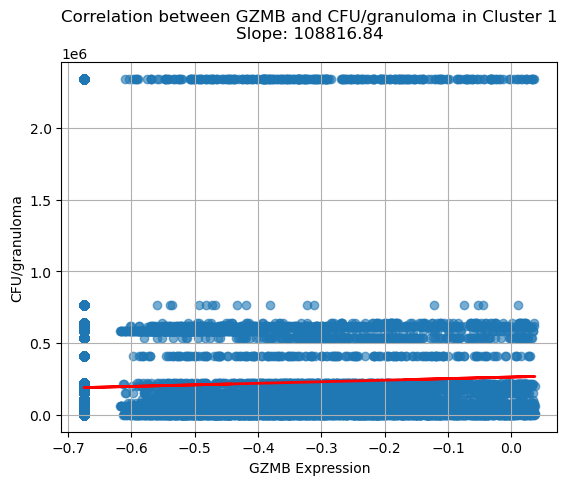

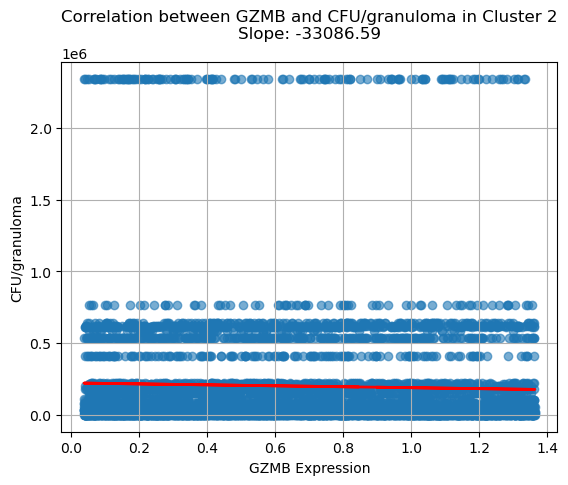

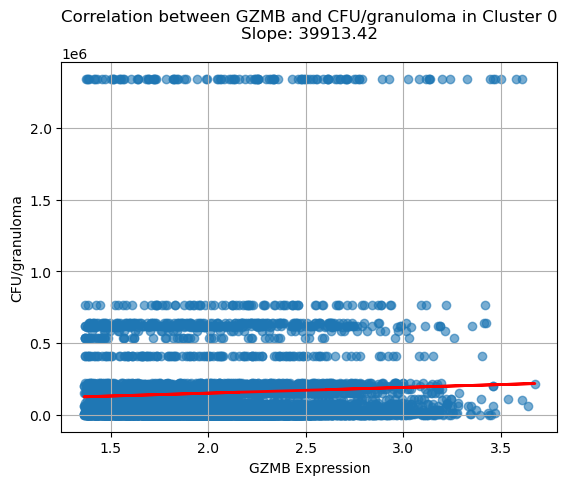

Cluster 1:
  Correlation between GZMB and CFU/granuloma: 0.04 (p-value: 2.94e-10)
Cluster 2:
  Correlation between GZMB and CFU/granuloma: -0.03 (p-value: 7.38e-03)
Cluster 0:
  Correlation between GZMB and CFU/granuloma: 0.03 (p-value: 1.09e-02)


In [46]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
data_clustering = pd.DataFrame({'GZMB': adata[:, 'GZMB'].X.flatten()})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[['GZMB']])

# Function for linear regression plot
def plot_with_regression(data, gene, cluster):
    X = data[gene].values.reshape(-1, 1)
    y = data['CFU/granuloma'].values
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    plt.scatter(data[gene], data['CFU/granuloma'], alpha=0.6)
    plt.plot(data[gene], reg.predict(X), color='red', linewidth=2)
    plt.title(f'Correlation between {gene} and CFU/granuloma in Cluster {cluster}\nSlope: {slope:.2f}')
    plt.xlabel(f'{gene} Expression')
    plt.ylabel('CFU/granuloma')
    plt.grid(True)
    plt.show()

# Visualize linearized correlations within each cluster
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    plot_with_regression(cluster_data, 'GZMB', cluster)

# Compare GZMB Expression within Clusters
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    correlation, p_value = spearmanr(cluster_data['GZMB'], cluster_data['CFU/granuloma'])
    print(f"Cluster {cluster}:")
    print(f"  Correlation between GZMB and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})")


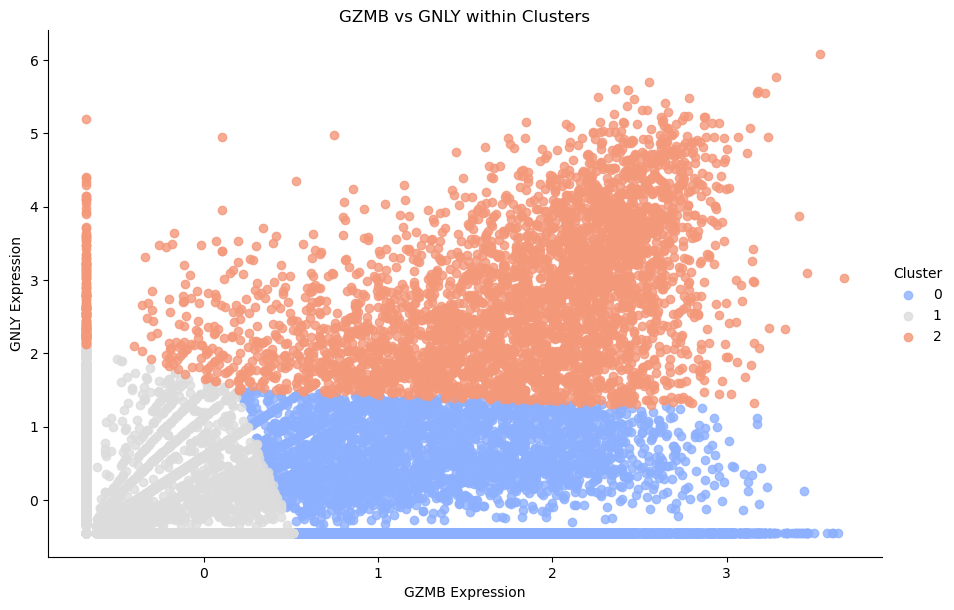

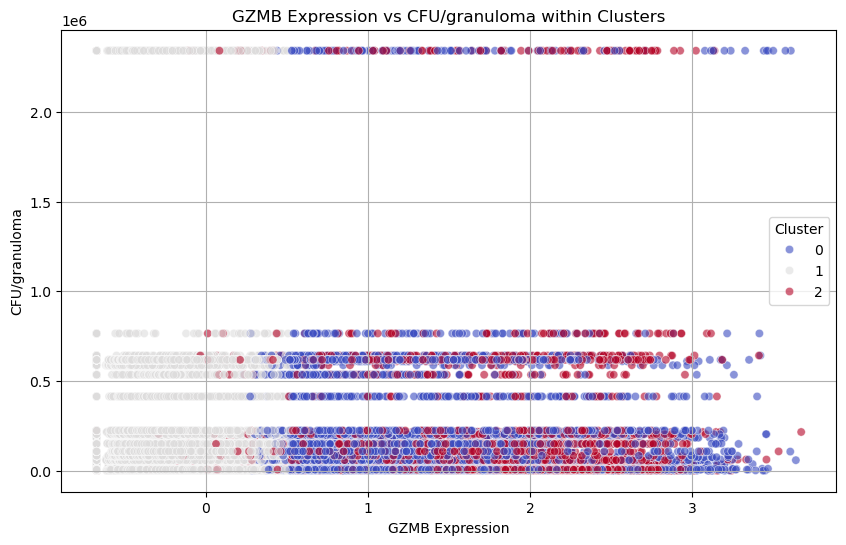

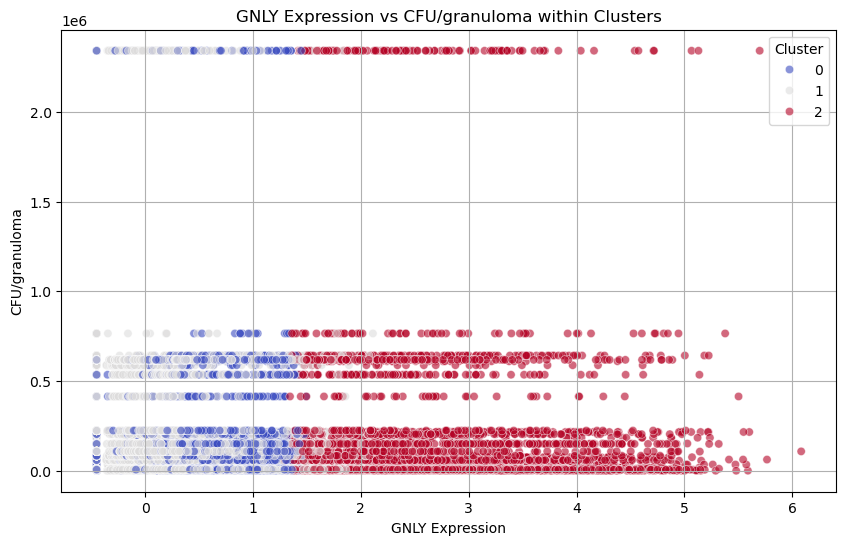

Cluster 1:
  Correlation between GZMB and CFU/granuloma: 0.02 (p-value: 1.57e-04)
Cluster 1:
  Correlation between GNLY and CFU/granuloma: 0.05 (p-value: 3.79e-22)
Cluster 0:
  Correlation between GZMB and CFU/granuloma: -0.18 (p-value: 1.12e-48)
Cluster 0:
  Correlation between GNLY and CFU/granuloma: 0.10 (p-value: 3.58e-17)
Cluster 2:
  Correlation between GZMB and CFU/granuloma: -0.10 (p-value: 4.21e-10)
Cluster 2:
  Correlation between GNLY and CFU/granuloma: 0.00 (p-value: 8.75e-01)


In [48]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
data_clustering = pd.DataFrame({'GZMB': adata[:, 'GZMB'].X.flatten(), 'GNLY': adata[:, 'GNLY'].X.flatten()})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[['GZMB', 'GNLY']])

# Visualize GZMB and GNLY expression with CFU/granuloma within clusters
gzm_gnly_scatter = sns.lmplot(x='GZMB', y='GNLY', data=data_clustering, hue='Cluster', palette='coolwarm', fit_reg=False, height=6, aspect=1.5)
plt.title('GZMB vs GNLY within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('GNLY Expression')
plt.show()

# Visualize GZMB expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GZMB'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GZMB Expression vs CFU/granuloma within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualize GNLY expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GNLY'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GNLY Expression vs CFU/granuloma within Clusters')
plt.xlabel('GNLY Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Compare GZMB and GNLY Expression within Clusters
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    for gene in ['GZMB', 'GNLY']:
        correlation, p_value = spearmanr(cluster_data[gene], cluster_data['CFU/granuloma'])
        print(f"Cluster {cluster}:")
        print(f"  Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})")


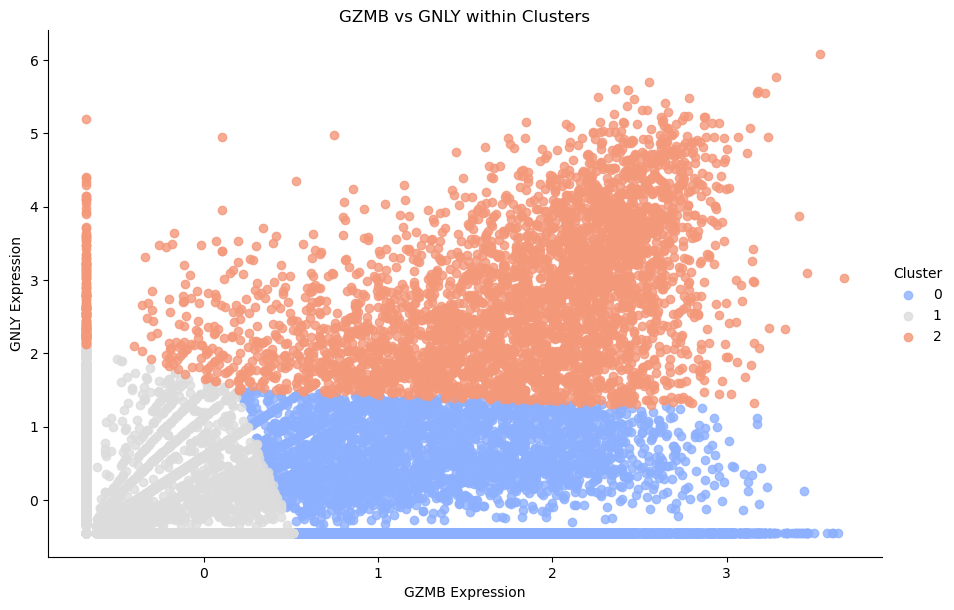

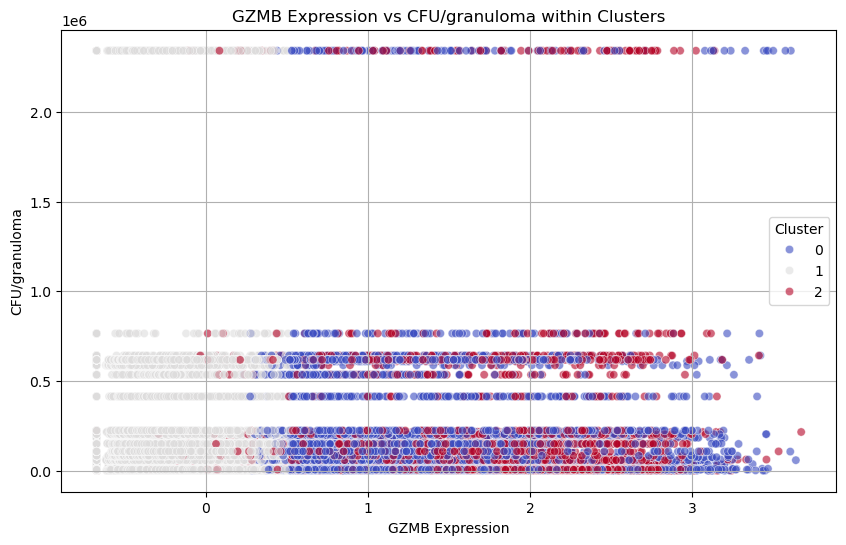

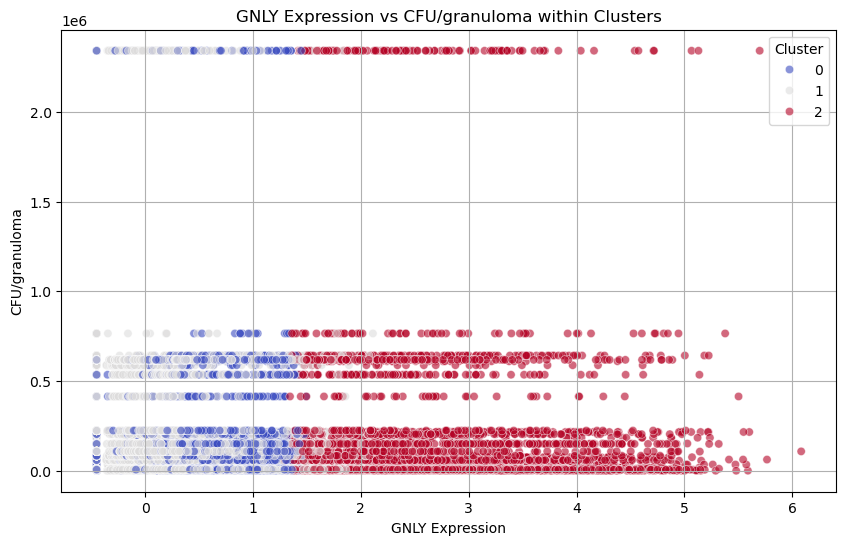

Cluster 1:
  Correlation between GZMB and CFU/granuloma: 0.02 (p-value: 1.57e-04)
Cluster 1:
  Correlation between GNLY and CFU/granuloma: 0.05 (p-value: 3.79e-22)
Cluster 0:
  Correlation between GZMB and CFU/granuloma: -0.18 (p-value: 1.12e-48)
Cluster 0:
  Correlation between GNLY and CFU/granuloma: 0.10 (p-value: 3.58e-17)
Cluster 2:
  Correlation between GZMB and CFU/granuloma: -0.10 (p-value: 4.21e-10)
Cluster 2:
  Correlation between GNLY and CFU/granuloma: 0.00 (p-value: 8.75e-01)


In [50]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import spearmanr
import os

# Create output directory if it doesn't exist
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the .h5ad file in backed mode
adata = sc.read_h5ad("all_cells.h5ad", backed='r')

# Extract relevant data
data_clustering = pd.DataFrame({'GZMB': adata[:, 'GZMB'].X.flatten(), 'GNLY': adata[:, 'GNLY'].X.flatten()})
data_clustering['CFU/granuloma'] = adata.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[['GZMB', 'GNLY']])

# Visualize GZMB and GNLY expression with CFU/granuloma within clusters
gzm_gnly_scatter = sns.lmplot(x='GZMB', y='GNLY', data=data_clustering, hue='Cluster', palette='coolwarm', fit_reg=False, height=6, aspect=1.5)
plt.title('GZMB vs GNLY within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('GNLY Expression')
plt.savefig(os.path.join(output_dir, 'GZMB_vs_GNLY_Clusters.png'))
plt.show()

# Visualize GZMB expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GZMB'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GZMB Expression vs CFU/granuloma within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'GZMB_vs_CFU_Clusters.png'))
plt.show()

# Visualize GNLY expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GNLY'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GNLY Expression vs CFU/granuloma within Clusters')
plt.xlabel('GNLY Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'GNLY_vs_CFU_Clusters.png'))
plt.show()

# Compare GZMB and GNLY Expression within Clusters
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    for gene in ['GZMB', 'GNLY']:
        correlation, p_value = spearmanr(cluster_data[gene], cluster_data['CFU/granuloma'])
        print(f"Cluster {cluster}:")
        print(f"  Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})")


In [52]:
from gprofiler import GProfiler

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# List of genes to analyze
genes = ['GZMB', 'GNLY']

# Perform GO analysis
result = gp.profile(organism='hsapiens', query=genes)
print(result[['source', 'native', 'name', 'p_value']])


ModuleNotFoundError: No module named 'gprofiler'

In [54]:
!pip install gprofiler-official

In [56]:
from gprofiler import GProfiler

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# List of genes to analyze
genes = ['GZMB', 'GNLY']

# Perform GO analysis
result = gp.profile(organism='hsapiens', query=genes)
print(result[['source', 'native', 'name', 'p_value']])


  source      native                                               name  \
0  GO:CC  GO:0044194                                  cytolytic granule   
1     WP   WP:WP2328                                Allograft rejection   
2  GO:BP  GO:0031640               killing of cells of another organism   
3  GO:BP  GO:0141061             disruption of cell in another organism   
4  GO:BP  GO:0141060  disruption of anatomical structure in another ...   

    p_value  
0  0.000076  
1  0.004608  
2  0.009859  
3  0.009859  
4  0.010516  


In [58]:
from gprofiler import GProfiler

# Initialize GProfiler for Macaca fascicularis (crab-eating macaque)
gp = GProfiler(return_dataframe=True)

# List of genes to analyze
genes = ['GZMB', 'GNLY']

# Perform GO analysis for crab-eating macaque
result = gp.profile(organism='mfascicularis', query=genes)
print(result[['source', 'native', 'name', 'p_value']])


Empty DataFrame
Columns: [source, native, name, p_value]
Index: []


In [60]:
from gprofiler import GProfiler

# Initialize GProfiler for Macaca fascicularis (crab-eating macaque)
gp = GProfiler(return_dataframe=True)

# List of genes to analyze
genes = ['ENSMFAG00000022094', 'ENSMFAG00000037335']  # Example macaque gene IDs

# Perform GO analysis for crab-eating macaque
result = gp.profile(organism='mfascicularis', query=genes)
print(result[['source', 'native', 'name', 'p_value']])


Empty DataFrame
Columns: [source, native, name, p_value]
Index: []


In [62]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import spearmanr
import os

# Create output directory if it doesn't exist
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the .h5ad file from the study
adata = sc.read_h5ad("all_cells.h5ad")

# Subset to CD8+ lymphocytes if they are labeled
adata_cd8 = adata[adata.obs['cell_type'] == 'CD8+ lymphocyte']

# Extract relevant data
data_clustering = pd.DataFrame({
    'GZMB': adata_cd8[:, 'GZMB'].X.flatten(), 
    'GNLY': adata_cd8[:, 'GNLY'].X.flatten()
})
data_clustering['CFU/granuloma'] = adata_cd8.obs['CFU/granuloma'].values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering[['GZMB', 'GNLY']])

# Visualize GZMB and GNLY expression within clusters
gzm_gnly_scatter = sns.lmplot(x='GZMB', y='GNLY', data=data_clustering, hue='Cluster', palette='coolwarm', fit_reg=False, height=6, aspect=1.5)
plt.title('GZMB vs GNLY within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('GNLY Expression')
plt.savefig(os.path.join(output_dir, 'GZMB_vs_GNLY_Clusters.png'))
plt.show()

# Visualize GZMB expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GZMB'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GZMB Expression vs CFU/granuloma within Clusters')
plt.xlabel('GZMB Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'GZMB_vs_CFU_Clusters.png'))
plt.show()

# Visualize GNLY expression and CFU/granuloma within clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_clustering['GNLY'], y=data_clustering['CFU/granuloma'], hue=data_clustering['Cluster'], palette='coolwarm', alpha=0.6)
plt.title('GNLY Expression vs CFU/granuloma within Clusters')
plt.xlabel('GNLY Expression')
plt.ylabel('CFU/granuloma')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'GNLY_vs_CFU_Clusters.png'))
plt.show()

# Compare GZMB and GNLY Expression within Clusters
for cluster in data_clustering['Cluster'].unique():
    cluster_data = data_clustering[data_clustering['Cluster'] == cluster]
    for gene in ['GZMB', 'GNLY']:
        correlation, p_value = spearmanr(cluster_data[gene], cluster_data['CFU/granuloma'])
        print(f"Cluster {cluster}:")
        print(f"  Correlation between {gene} and CFU/granuloma: {correlation:.2f} (p-value: {p_value:.2e})")


MemoryError: Unable to allocate 4.65 GiB for an array with shape (41976, 29766) and data type float32